In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

# calculate accuracy measures and confusion matrix
from sklearn import metrics
import pydotplus

from sklearn.tree import DecisionTreeClassifier

In [2]:
credit_df = pd.read_csv("credit.csv")

In [3]:
credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [5]:
credit_df.head(10)  #let us look at the raw data. As is evident, there are lot of missing values 

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [6]:
credit_df.shape

(1000, 17)

In [7]:
credit_df.describe(include=[np.number])


,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
credit_df["employment_duration"].value_counts()

1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64

In [9]:
credit_df["savings_balance"].value_counts()

< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64

In [10]:
credit_df["purpose"].value_counts()

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

In [11]:
credit_df["credit_history"].value_counts()

good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

In [12]:
credit_df["phone"] = pd.Categorical(credit_df["phone"]).codes
credit_df["default"] = pd.Categorical(credit_df["default"]).codes

In [13]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

# for feature in credit_df.columns: # Loop through all columns in the dataframe
#     if credit_df[feature].dtype == 'object': # Only apply for columns with categorical strings
#         credit_df[feature] = pd.Categorical(credit_df[feature]).codes # Replace strings with an integer

In [14]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null int8
default                 1000 non-null int8
dtypes: int64(7), int8(2), object(8)
memory usage: 119.2+ KB


In [15]:
credit_df=pd.get_dummies(credit_df, columns=["checking_balance","credit_history","purpose","savings_balance","employment_duration", "other_credit",
                                      "housing","job"])

In [16]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
months_loan_duration               1000 non-null int64
amount                             1000 non-null int64
percent_of_income                  1000 non-null int64
years_at_residence                 1000 non-null int64
age                                1000 non-null int64
existing_loans_count               1000 non-null int64
dependents                         1000 non-null int64
phone                              1000 non-null int8
default                            1000 non-null int8
checking_balance_1 - 200 DM        1000 non-null uint8
checking_balance_< 0 DM            1000 non-null uint8
checking_balance_> 200 DM          1000 non-null uint8
checking_balance_unknown           1000 non-null uint8
credit_history_critical            1000 non-null uint8
credit_history_good                1000 non-null uint8
credit_history_perfect             1000 non-null uint8
credit_history_p

In [17]:
# # Pairplot using sns
# import seaborn as sns
# sns.pairplot(credit_df, hue = "default")

In [18]:
credit_df.head(10) 

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,default,checking_balance_1 - 200 DM,...,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled
0,6,1169,4,4,67,2,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,48,5951,2,2,22,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,42,7882,2,4,45,1,2,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,1,0,1,0,0,0,1,0,0
5,36,9055,2,4,35,1,2,1,0,0,...,0,1,0,1,0,0,0,0,0,1
6,24,2835,3,4,53,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
7,36,6948,2,2,35,1,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0
8,12,3059,2,4,61,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
9,30,5234,4,2,28,2,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0


In [19]:
# col_labels = [ 'checking_balance', 'months_loan_duration' ,'credit_history' , 'purpose, amount', 'savings_balance' , 'employment_duration'
# , 'percent_of_income', 'years_at_residence', 'age', 'other_credit', 'housing', 'existing_loans_count', 'job', 'dependents', 'phone', 'default']

In [20]:
# train_char_label = ['No', 'Yes']

In [21]:
# capture the target column ("default") into separate vectors for training set and test set

X = credit_df.drop("default" , axis=1)

y = credit_df.pop("default")




In [22]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [23]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [24]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [25]:
list(X_train.columns)

['months_loan_duration',
 'amount',
 'percent_of_income',
 'years_at_residence',
 'age',
 'existing_loans_count',
 'dependents',
 'phone',
 'checking_balance_1 - 200 DM',
 'checking_balance_< 0 DM',
 'checking_balance_> 200 DM',
 'checking_balance_unknown',
 'credit_history_critical',
 'credit_history_good',
 'credit_history_perfect',
 'credit_history_poor',
 'credit_history_very good',
 'purpose_business',
 'purpose_car',
 'purpose_car0',
 'purpose_education',
 'purpose_furniture/appliances',
 'purpose_renovations',
 'savings_balance_100 - 500 DM',
 'savings_balance_500 - 1000 DM',
 'savings_balance_< 100 DM',
 'savings_balance_> 1000 DM',
 'savings_balance_unknown',
 'employment_duration_1 - 4 years',
 'employment_duration_4 - 7 years',
 'employment_duration_< 1 year',
 'employment_duration_> 7 years',
 'employment_duration_unemployed',
 'other_credit_bank',
 'other_credit_none',
 'other_credit_store',
 'housing_other',
 'housing_own',
 'housing_rent',
 'job_management',
 'job_skille

In [27]:
from sklearn import tree
import pydotplus
from IPython.display import Image
train_char_label = ['No', 'Yes']
dot_data = tree.export_graphviz(dt_model, out_file=None, feature_names = list(X_train),
                               class_names = list(train_char_label))
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())



InvocationException: GraphViz's executables not found

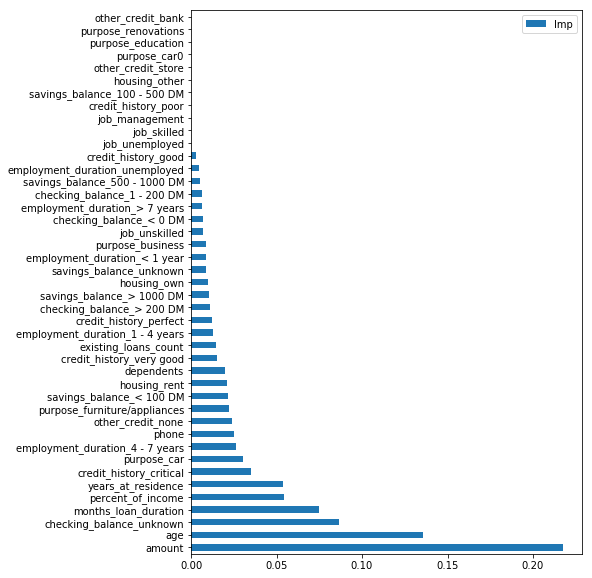

In [40]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
#dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names= y)

Credit_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(['Imp'],ascending=False).plot(kind="barh",figsize=(7,10))



In [29]:
# # You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
# #or create a .png as below

system("dot -Tpng D:\credit_tree.dot -o D:/credit_tree.png")
Image(r"d:\credit_tree.png")

In [52]:
y_predict = dt_model.predict(X_test)

In [53]:
print(dt_model.score(X_train , train_labels))
print(dt_model.score(X_test , test_labels))

1.0
0.6566666666666666


In [54]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[158  56]
 [ 47  39]]


In [ ]:
# Look at the class level metric for the defaulter class. It is poor. 

#                                      Regularising the Decision Tree

In [55]:

reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [56]:
credit_tree_regularized = open('d:\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                                      Imp
months_loan_duration             0.068614
amount                           0.199362
percent_of_income                0.048258
years_at_residence               0.060183
age                              0.157350
existing_loans_count             0.009213
dependents                       0.016396
phone                            0.019657
checking_balance_1 - 200 DM      0.008941
checking_balance_< 0 DM          0.006838
checking_balance_> 200 DM        0.013523
checking_balance_unknown         0.086429
credit_history_critical          0.035237
credit_history_good              0.006041
credit_history_perfect           0.012299
credit_history_poor              0.003056
credit_history_very good         0.005374
purpose_business                 0.008469
purpose_car                      0.030203
purpose_car0                     0.000000
purpose_education                0.000000
purpose_furniture/appliances     0.021026
purpose_renovations              0

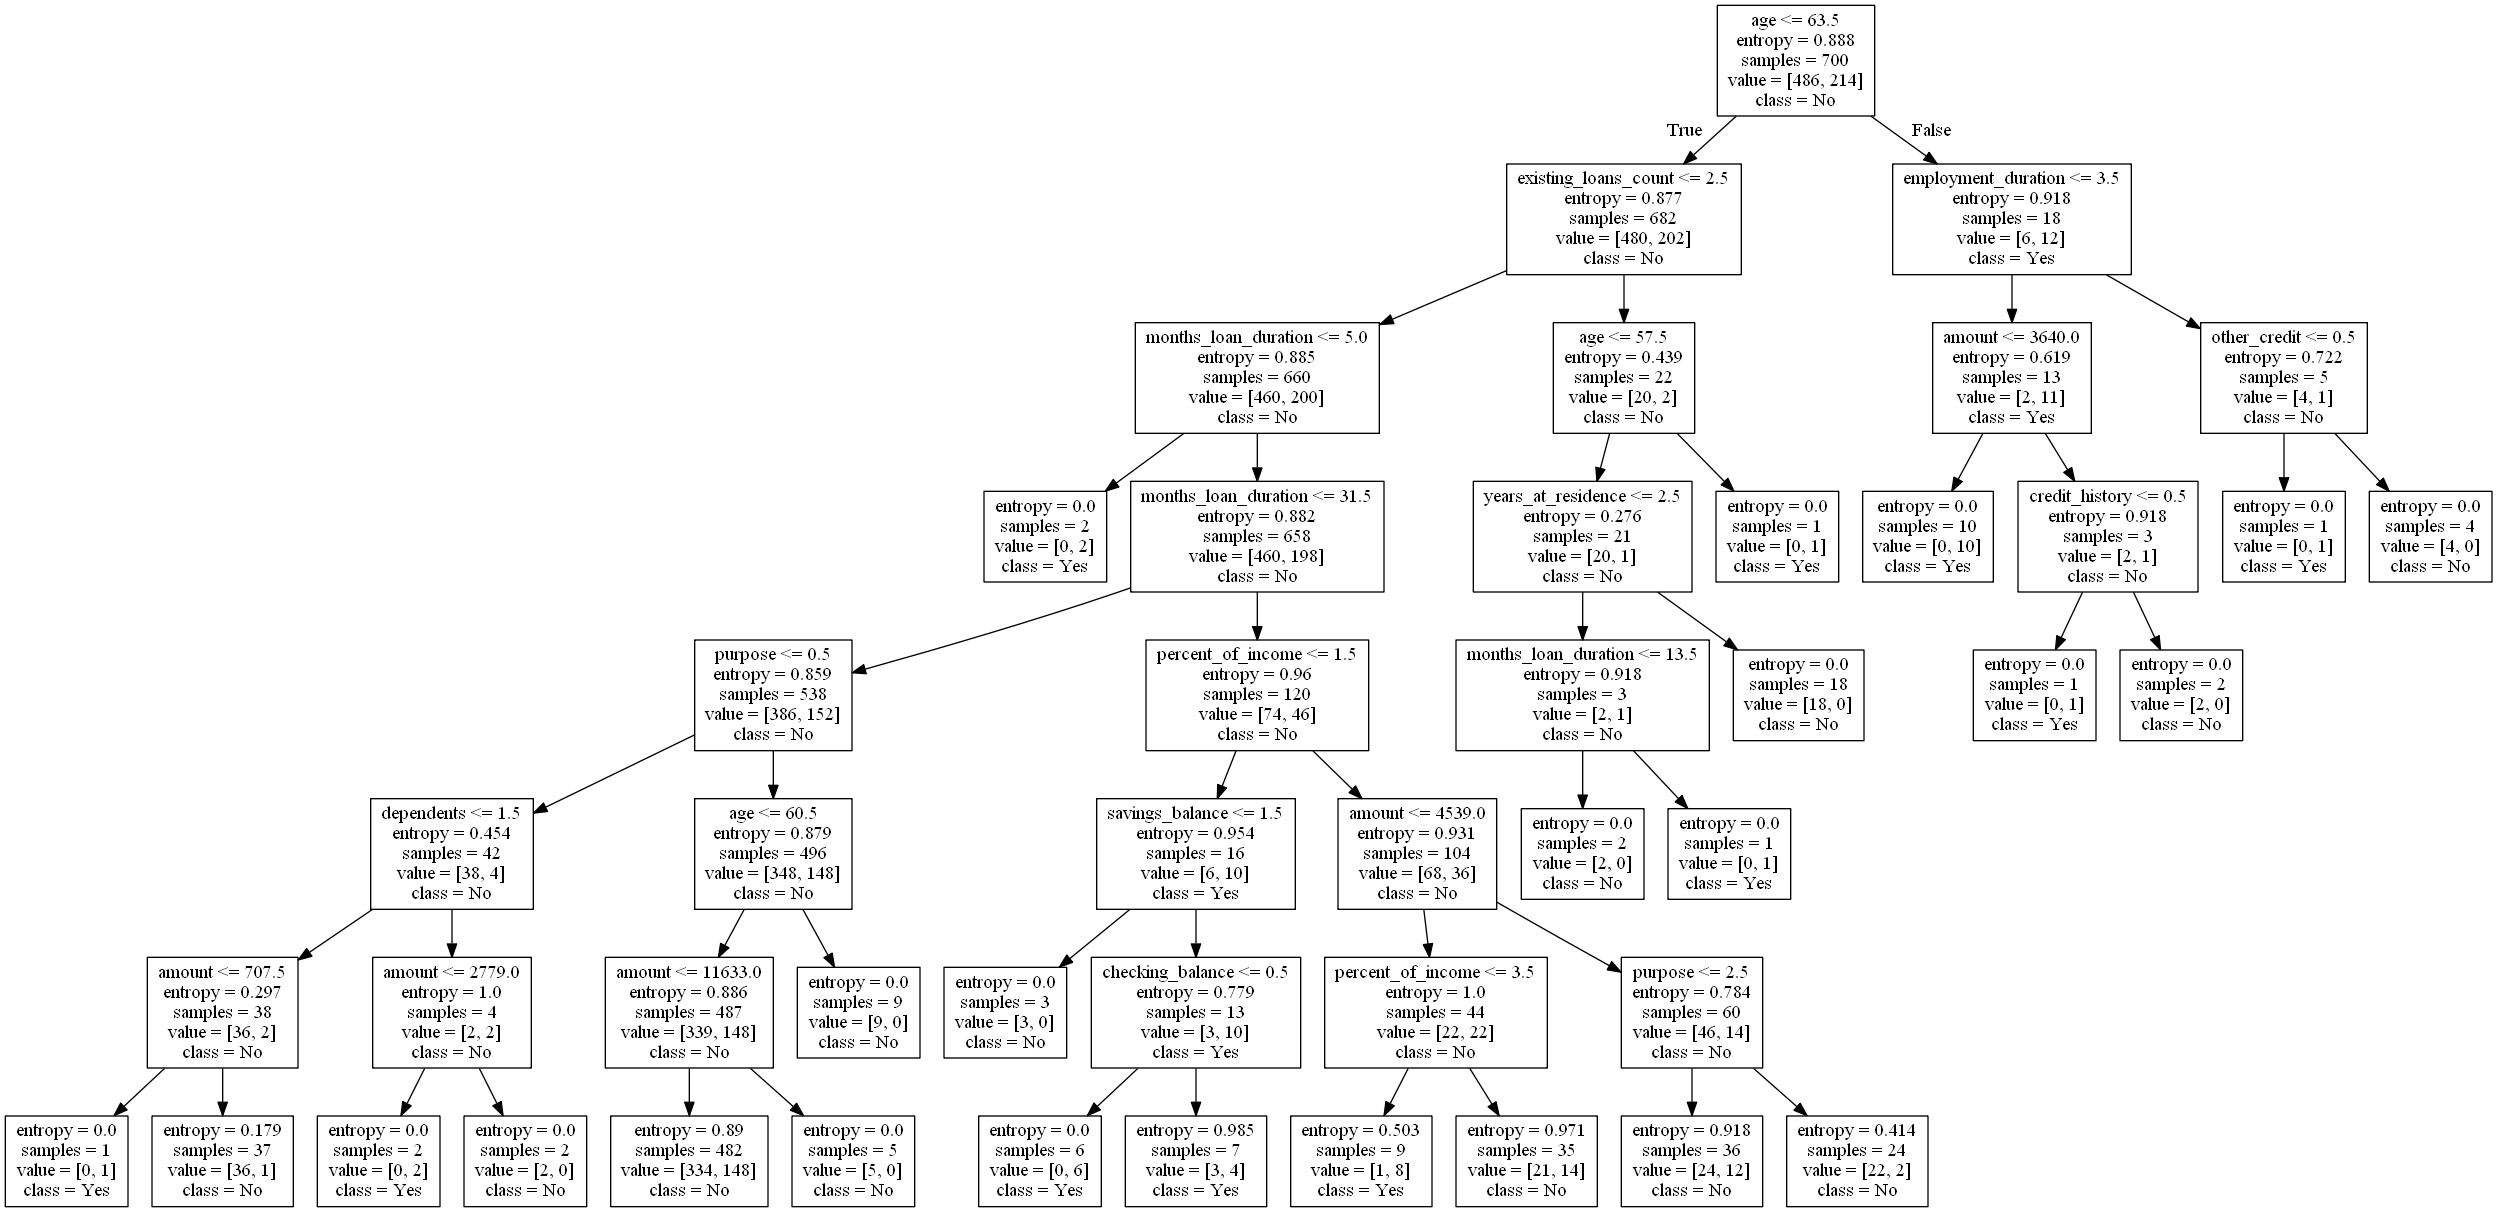

In [163]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view
# or create a .png as below
system("dot -Tpng D:\credit_tree_regularized.dot -o D:/credit_tree_regularized.png")
Image("d:\credit_tree_regularized.png")

In [57]:
y_predict = reg_dt_model.predict(X_test)

In [58]:
reg_dt_model.score(X_test , test_labels)

0.6466666666666666

In [59]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[149  65]
 [ 41  45]]


#                             Ensemble Learning - Bagging

In [60]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train, train_labels)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [61]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , test_labels))

print(metrics.confusion_matrix(test_labels, y_predict))

0.75
[[185  29]
 [ 46  40]]


# Ensemble Learning - AdaBoosting

In [65]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
#abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train, train_labels)


In [66]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , test_labels))

print(metrics.confusion_matrix(test_labels, y_predict))

0.66
[[159  55]
 [ 47  39]]


#                     Ensemble Learning - GradientBoost

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, train_labels)


In [70]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.7333333333333333
[[194  20]
 [ 60  26]]


# Ensemble RandomForest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, train_labels)


In [72]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.7633333333333333
[[202  12]
 [ 59  27]]
